1. Setup and Loadin Data


1.1 Install dependencies and setup:
Following packages are required:
Tensorflow, Tensorflow-gpu, opencv-python, matplotlib

	• Tensorflow
		• TensorFlow is an open-source deep learning framework developed by Google. It provides a comprehensive ecosystem for building and deploying machine learning (ML) and deep learning models.
		• Key Features:
			• Low-Level Operations: Allows detailed control over tensors (multi-dimensional arrays) and their computations.
			• Scalability: Can be used to train models on CPUs, GPUs, or TPUs (Tensor Processing Units).
			• Deployment: Models can be deployed on web, mobile, and edge devices.
			• Versatility: Supports ML, deep learning, and even reinforcement learning tasks.
		• Why Use It for CNNs? TensorFlow's efficient handling of matrix operations and GPU acceleration makes it well-suited for computationally intensive tasks like CNNs.
	• Keras
		• Keras is a high-level deep learning API built on top of TensorFlow. It simplifies the process of creating and training deep learning models by providing an easy-to-use interface.
		• Key Features:
			• User-Friendly: Abstracts the complexity of TensorFlow, making model building straightforward.
			• **Modularity**: Models are created by combining layers, which can be stacked, configured, and reused.
			• Pre-Trained Models: Offers pre-trained networks like VGG, ResNet, etc., which can be fine-tuned for specific tasks.
		• Why Use It for CNNs? Keras is perfect for building CNNs because:
			• It provides predefined layers like Conv2D (for convolution) and MaxPooling2D (for pooling).
			• It simplifies model compilation, training, and evaluation with functions like compile(), fit(), and evaluate().
	• Tensorflow-gpu
		• TensorFlow-GPU is a version of the TensorFlow library that is optimized to use a GPU (Graphics Processing Unit) instead of a CPU (Central Processing Unit) for faster computation.
		When you train a deep learning model (like a CNN), it involves a huge number of calculations, such as matrix multiplications and convolutions. GPUs are designed to handle such tasks much more efficiently than CPUs due to their parallel processing capabilities.
	• opencv-python
		• OpenCV (Open Source Computer Vision Library) is an open-source library designed for real-time computer vision and image processing. It provides a wide range of tools for manipulating images and videos, making it highly useful for tasks like:
			§ Image Processing: Filtering, resizing, rotating, and cropping images.
			§ Feature Detection: Identifying edges, corners, or specific patterns in an image.
			§ Object Detection: Detecting faces, objects, or motions in videos/images.
			§ Image Segmentation: Dividing an image into meaningful parts.
			§ Video Analysis: Tracking objects, reading video frames, etc.
	• matplotlib
		• Matplotlib is a Python library used for data visualization. It helps you create plots, graphs, and charts to represent data visually. It’s often used in conjunction with libraries like NumPy and Pandas for analyzing and presenting data.
		Key Features:
			• Line Plots: Plotting functions and trends.
			• Scatter Plots: Visualizing distributions and relationships.
			• Histograms: Analyzing frequency distributions.
			• Image Display: Displaying images using matplotlib.pyplot.imshow()



In [49]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


After installating all the packages, check Tensorflow installation.

In [20]:
import tensorflow as tf
import os

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# Simple TensorFlow operation
x = tf.constant([[1, 2], [3, 4]])
print("Tensor:", x)


TensorFlow version: 2.18.0
Tensor: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [21]:
#Avoid OOM errors by setting GPU Memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

1.2 Removing Dodgy images


*   We can use the "Download All Images" extension to get the dataset
*   First we download a dataset for Happy people, and then get a set of Sad people.
*   Now, sometimes when we download images, they might be of wrong extension, might be corrupted, etc.
*   Hence, we neec to remove those dodgy images.

In [22]:
import cv2 #Open Computer Vision
import imghdr #Used to check the extension

In [23]:
data_dir = '/content/Data'

In [24]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png'] #Acceptable extensions

In [25]:
for image_class in os.listdir(data_dir):
    print(image_class) #This return every item in the Happy folder

Happy
Sad
testing
.ipynb_checkpoints


In [26]:
import cv2
import os
import matplotlib #for future use
file_path = '/content/Data/Sad/199816057.jpg'

if os.path.exists(file_path):
    img = cv2.imread(file_path)
    print(img.shape)  # Will print out the image as a numpy array
else:
    print(f"File {file_path} not found!")


(1119, 1500, 3)


In [27]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path) #Loading image into OpenCV
            tip = imghdr.what(image_path) #Loading image into imghdr
            if tip not in image_exts: #Checks for acceptable extensions
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/Data/Happy/Happy20People.jpg
Image not in ext list /content/Data/Happy/getty_152414899_97046097045006_68075.jpg
Image not in ext list /content/Data/Sad/clip-art-seas-internet-scams-and-frauds-best-home-business-is-1713890451800.webp
Image not in ext list /content/Data/Sad/depositphotos_217564870-stock-photo-young-attractive-sad-black-african.jpg
Image not in ext list /content/Data/Sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list /content/Data/Sad/sad-people-are-standing-rooftop-092116870_prevstill.jpeg


In [28]:
import cv2
import os

file_path = os.path.join('/content/Data/Happy', '372579397.jpg')

if os.path.exists(file_path):
    img = cv2.imread(file_path)
    print(img)  # Should print <class 'numpy.ndarray'> if successful
else:
    print(f"File {file_path} not found!")


[[[240 236 231]
  [240 236 231]
  [240 236 231]
  ...
  [243 235 228]
  [243 235 228]
  [243 235 228]]

 [[240 236 231]
  [240 236 231]
  [240 236 231]
  ...
  [243 235 228]
  [243 235 228]
  [243 235 228]]

 [[240 236 231]
  [240 236 231]
  [240 236 231]
  ...
  [243 235 228]
  [243 235 228]
  [243 235 228]]

 ...

 [[ 34  34  34]
  [ 34  34  34]
  [ 34  34  34]
  ...
  [ 34  34  34]
  [ 34  34  34]
  [ 34  34  34]]

 [[ 34  34  34]
  [ 34  34  34]
  [ 34  34  34]
  ...
  [ 34  34  34]
  [ 34  34  34]
  [ 34  34  34]]

 [[ 34  34  34]
  [ 34  34  34]
  [ 34  34  34]
  ...
  [ 34  34  34]
  [ 34  34  34]
  [ 34  34  34]]]


1.3 Loading Data


In [29]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [30]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('/content/Data') #Loading data
print(data.element_spec)
data_iterator = data.as_numpy_iterator() #.as_numpy_iterator() converts the TensorFlow dataset into a NumPy iterator, allowing you to iterate over batches as NumPy arrays.
batch = data_iterator.next() #This is telling the iterator to go to the next object

Found 177 files belonging to 3 classes.
(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [31]:
batch #images represented as numpy arrays

(array([[[[250.      , 250.      , 250.      ],
          [250.11133 , 249.88867 , 250.      ],
          [251.      , 249.      , 250.      ],
          ...,
          [251.18555 , 250.81445 , 253.      ],
          [251.      , 251.      , 253.      ],
          [251.      , 251.      , 253.      ]],
 
         [[250.      , 250.      , 250.      ],
          [250.11133 , 249.88867 , 250.      ],
          [251.      , 249.      , 250.      ],
          ...,
          [251.18555 , 250.81445 , 253.      ],
          [251.      , 251.      , 253.      ],
          [251.      , 251.      , 253.      ]],
 
         [[250.      , 250.      , 250.      ],
          [250.11133 , 249.88867 , 250.      ],
          [251.      , 249.      , 250.      ],
          ...,
          [251.18555 , 250.81445 , 253.      ],
          [251.      , 251.      , 253.      ],
          [251.      , 251.      , 253.      ]],
 
         ...,
 
         [[243.21289 , 181.86133 , 158.54776 ],
          [241.255

In [32]:
batch[1] #Our images are going to be in key 0, while our labels are going to be in key 1

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

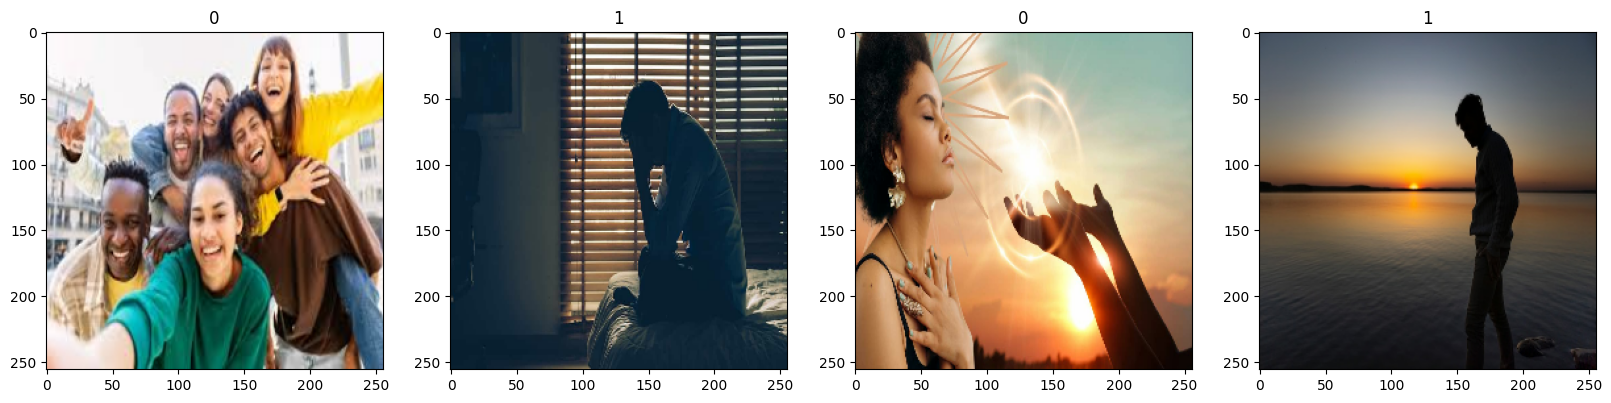

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])
#From the output, we can see that 0 graphs represent Happy Class, while 1 represents Sad Class

2. Preprocessing the data
Now we need to scale our image values to be between 0 and 1, instead of 0 to 255, this helps our Deep Learning model generalize faster and categorize better, thus, effectively producing better results.
We also have to split out data into Training, Testing and Validation partitions, to ensure that we don't overfit.

2.1 Scale Data

In [34]:
scaled = batch[0] /255 #To put values between 0 and 255
print(scaled.max())
print(scaled.min())
#However, doing this is really efficient, i.e. doing individual division separately, so what we do is, we divide while loading in the data only

1.0
0.0


In [35]:
#For scaling while loading, we utilize the data pipeline functions
data = data.map(lambda x,y: (x/255,y)) #x are the images, y are the labels

In [36]:
scaled_iterator = data.as_numpy_iterator() #In the output, we can see all values are scaled now
batch = scaled_iterator.next()

In [37]:
batch[0].max()

1.0

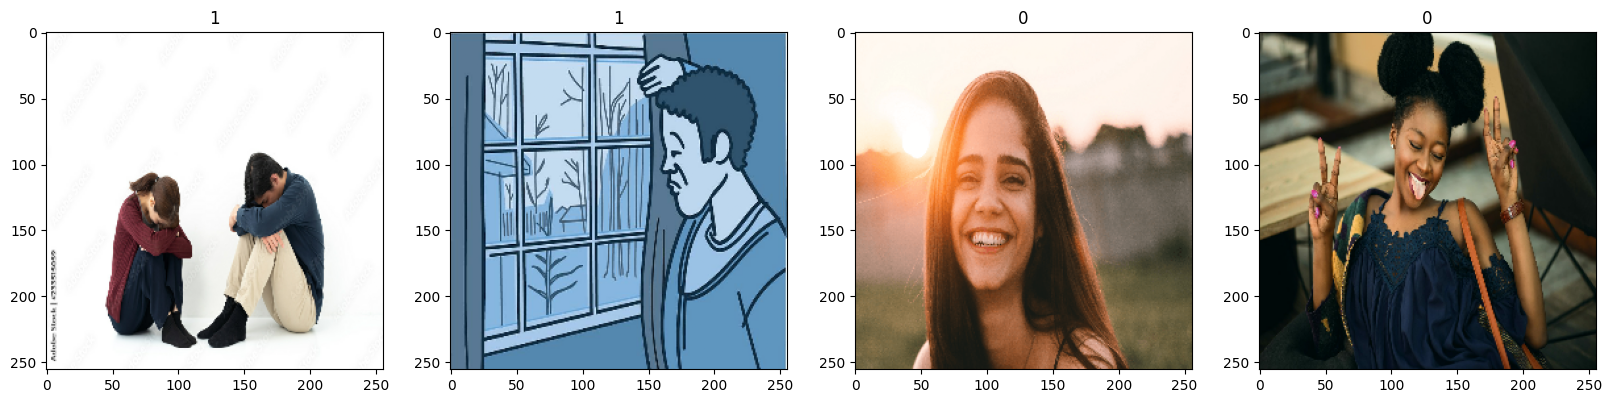

In [38]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

2.2 Splitting Data

In [39]:
len(data)

6

In [40]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1
print(train_size, val_size, test_size) #Its number of batches, each batch = 32 images
print((train_size + val_size + test_size) == len(data))

4 1 1
True


In [41]:
train = data.take(train_size) #We are telling how many batches for training
val = data.skip(train_size).take(val_size) #Skip the first one of Training set
test = data.skip(train_size+val_size).take(test_size)
print(len(train), len(val), len(test))

4 1 1


3. CNN model

3.1 Building the model

In [42]:
#!pip install tensorflow.keras

In [43]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten #These are CNN Layers

In [44]:
model = Sequential() #Establishing an instance of the sequencial model
# Adding layers to the instance:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3))) # 16 filters, Filter size is 3X3, stride of 1 (it means it will move one pixel at a time)
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # This will give a single output, either 1 or 0 using a sigmoid function, its like Naive Bayes graph vertical, if the value falls on one side, it is classified as such

#Now we need to compile the model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) # Adam is the optimizer, specifing what a loss is, tracking which metric to track
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

3.2 Training the model

In [53]:
logdir = '/content/Logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


AttributeError: module 'tensorflow.python.distribute.input_lib' has no attribute 'DistributedDatasetInterface'

In [ ]:
hist.history

3.3 Now we have got our history, so we can plot the performance   

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc="upper right")
plt.show()
# If we notice that the Loss is going down but our Val_loss goes up, that means the model may be overfitting, and we might need to normalize our data
# If the Vals dont go down, then that means there could be some issue with the training data

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='loss')
plt.plot(hist.history['val_accuracy'], color='red', label='val_loss')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc="upper right")
plt.show()

4. Evaluate Performance

4.1 Evaluation

In [52]:
from tensorflow.python.keras.metrics import Precision, Recall, BinaryAccuracy
#Making instances
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} jpeg::Uncompress failed. Invalid JPEG data or crop window.
	 [[{{node decode_image/DecodeImage}}]] [Op:IteratorGetNext] name: 

4.2 Testing

In [ ]:
import cv2
img = cv2.imread('/content/Data/happy.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
resize = tf,image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
np.expand_dims(resize, 0)

yhat = model.predict(np.expand_dims(resize/255, 0))